<a href="https://colab.research.google.com/github/sudale/Android-App/blob/master/gen02_flower_photos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
# 이미지 증각 객체 작성
gen = ImageDataGenerator(rotation_range = 15,
                         width_shift_range = 0.3,
                         shear_range=0.1,
                         rescale=1./255)

In [25]:
# 증강 이미지 적용 및 실생
data_path = '/content/gdrive/MyDrive/flower_photos'
batch_siz = 3670

data_gen = gen.flow_from_directory(directory=data_path,
                                   batch_size=batch_siz,
                                   shuffle=True,
                                   target_size=(100, 100),
                                   class_mode='categorical')

Found 2313 images belonging to 5 classes.


In [26]:
img, label = data_gen.next()
print(len(img))

2313


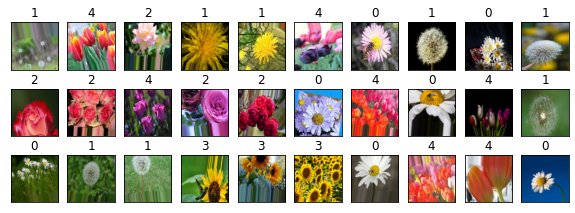

In [27]:
plt.figure(figsize=(10,12))
for i in range(30):
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])

In [28]:
import numpy as np

result = []
for i in range(2313):
  result.append(np.argmax(label[i]))
result = np.array(result).reshape(-1, 1)
result.shape

(2313, 1)

In [29]:
#train_data, test_data split
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(img, result,test_size=0.3,
shuffle=False, random_state=1004)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1619, 100, 100, 3)
x_test shape: (694, 100, 100, 3)
y_train shape: (1619, 1)
y_test shape: (694, 1)


In [31]:
#(One Hot encoding)
y_train=tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test=tf.keras.utils.to_categorical(y_test, num_classes=5)

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),input_shape=(100,100,3), padding='same', activation='relu'))
cnn.add(Conv2D(32,(3,3),input_shape=(100,100,3), padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(5, activation='softmax'))

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 50, 64)        36928     
                                                      

In [34]:
from datetime import datetime

start_time = datetime.now()

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# 손실함수가 5 epochs을 진행을 검사하여 더 이상 줄어들지 않으면 종료
# EarlyStopping(모니터링 값, 대기 epochs)

early_stoping=EarlyStopping(monitor='val_loss', patience=5)

# 학습 중인 모델을 자동 저장
model_checkpoint=ModelCheckpoint(filepath="/content/gdrive/MyDrive/data/bast.h5",
                                 monitor='val_loss',
                                 save_base_only=True,
                                 verbose=1)

hist=cnn.fit(x_train, y_train, batch_size=256, epochs=250, validation_data=(x_test, y_test),
             callbacks=[early_stoping, model_checkpoint])

end_time = datetime.now()

print('Elapsed Time =>', end_time-start_time)

Epoch 1/250
7/7 [==============================] - ETA: 0s - loss: 1.6142 - accuracy: 0.2069
Epoch 1: saving model to /content/gdrive/MyDrive/data/bast.h5
7/7 [==============================] - 3s 324ms/step - loss: 1.6142 - accuracy: 0.2069 - val_loss: 1.5989 - val_accuracy: 0.2378
Epoch 2/250
7/7 [==============================] - ETA: 0s - loss: 1.5815 - accuracy: 0.2742
Epoch 2: saving model to /content/gdrive/MyDrive/data/bast.h5
7/7 [==============================] - 2s 231ms/step - loss: 1.5815 - accuracy: 0.2742 - val_loss: 1.5661 - val_accuracy: 0.2939
Epoch 3/250
7/7 [==============================] - ETA: 0s - loss: 1.5323 - accuracy: 0.2446
Epoch 3: saving model to /content/gdrive/MyDrive/data/bast.h5
7/7 [==============================] - 2s 232ms/step - loss: 1.5323 - accuracy: 0.2446 - val_loss: 1.5344 - val_accuracy: 0.4164
Epoch 4/250
7/7 [==============================] - ETA: 0s - loss: 1.4786 - accuracy: 0.3737
Epoch 4: saving model to /content/gdrive/MyDrive/data/b

In [35]:
cnn.evaluate(x_test, y_test)

22/22 [==============================] - 0s 14ms/step - loss: 0.6022 - accuracy: 0.7824


[0.6021853089332581, 0.7824207544326782]

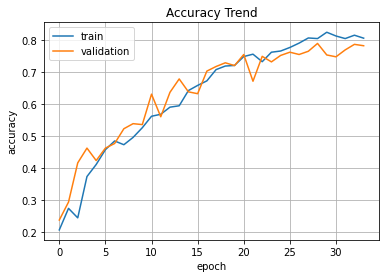

In [36]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

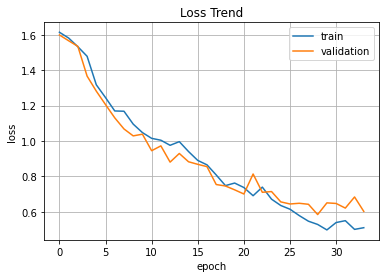

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [39]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [40]:
map = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [41]:
plt.figure(figsize=(6, 6))
predicted_value = cnn.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predicted_value, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=map, yticklabels=map)
plt.show()

22/22 [==============================] - 0s 10ms/step


ValueError: ignored

<Figure size 432x432 with 0 Axes>

In [ ]:
img_path = "/content/gdrive/MyDrive/data/daisy.jpg"
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")

In [ ]:
img_path = "/content/gdrive/MyDrive/data/rose.jpg"
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")

In [ ]:
img_path = "/content/gdrive/MyDrive/data/1.jpg"
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")

In [ ]:
img_path = "/content/gdrive/MyDrive/data/2.jpg"
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")

In [ ]:
img_path = "/content/gdrive/MyDrive/data/3.jpg"
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")

In [ ]:
img_path = "/content/gdrive/MyDrive/data/4.jpg"
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")